## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [3]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.vstack((X1.flatten(),X2.flatten())).T # list of the coordinates of points on the grid
N = size(x,axis=0)
N1 = len(X1)
N2 = len(X2)

# Then compute the sampled prediction class_L for each couple (X1,X2)

---

## Estimation of the data parameters

We should first split the datasets for each class.

In [4]:
train_1 = train[train[:,0]==1][:,1:]
n1 = len(train_1)

In [5]:
train_2 = train[train[:,0]==2][:,1:]
n2 = len(train_2)

We should also prepare the train and test set.

In [6]:
trainset = train[:,1:]
testset = test[:,1:]

We should then compute the estimated parameters $\pi_{i}, \mu_{i},\Sigma_{i}$ and $\Sigma$.

In [7]:
pi_1 = len(train_1)/len(train)
pi_2 = len(train_2)/len(train)

In [8]:
mu_1 = np.mean(train_1,axis=0)
mu_2 = np.mean(train_2,axis=0)

In [9]:
sigma_1 = np.cov(train_1.T)
sigma_2 = np.cov(train_2.T)

In [10]:
sigma = 1/len(train)*(n1*sigma_1+n2*sigma_2)

We also need to compute the inverses of $\Sigma_{1},\Sigma_{2}$ and $\Sigma$.

In [11]:
sigma_1_inv = la.inv(sigma_1)
sigma_2_inv = la.inv(sigma_2)
sigma_inv = la.inv(sigma)

Let's now compute the Bayes classifier for LDA (using $\Sigma$) and for QDA (using $\Sigma_{1}$ and $\Sigma_{2}$)

## LDA

LDA classifier: we use common variance matrix $\Sigma$.

Let's first do it for the training set.

In [12]:
predicted_train_class_LDA  = np.zeros(len(train),dtype = np.int8)
train_error_LDA = 0
for i in range(len(trainset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(trainset[i]-mu_1).T.dot(sigma_inv).dot(trainset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(trainset[i]-mu_2).T.dot(sigma_inv).dot(trainset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_train_class_LDA [i] = 1
    else:
        predicted_train_class_LDA [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_train_class_LDA [i] != train[i][0]:
        train_error_LDA +=1
train_error_LDA = train_error_LDA/len(train)

In [13]:
print("LDA train error: ",train_error_LDA*100,"%")

LDA train error:  3.0 %


In [14]:
predicted_train_class_LDA= np.reshape(predicted_train_class_LDA,(-1,1))
predicted_trainset_LDA = np.concatenate((predicted_train_class_LDA,trainset),axis = 1)

We can do the same thing for the test set.

In [15]:
predicted_test_class_LDA  = np.zeros(len(test),dtype = np.int8)
test_error_LDA = 0
for i in range(len(testset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(testset[i]-mu_1).T.dot(sigma_inv).dot(testset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(testset[i]-mu_2).T.dot(sigma_inv).dot(testset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_test_class_LDA [i] = 1
    else:
        predicted_test_class_LDA [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_test_class_LDA [i] != test[i][0]:
        test_error_LDA +=1
test_error_LDA = test_error_LDA/len(test)

In [16]:
print("LDA test error: ",test_error_LDA*100,"%")

LDA test error:  5.5 %


In [17]:
predicted_test_class_LDA = np.reshape(predicted_test_class_LDA,(-1,1))
predicted_testset_LDA = np.concatenate((predicted_test_class_LDA,testset),axis = 1)

## QDA

QDA classifier: we use matrixes $\Sigma_{1}$ and $\Sigma_{2}$ 

Let's first do it for the training set.

In [18]:
predicted_train_class_QDA  = np.zeros(len(train),dtype = np.int8)
train_error_QDA = 0
for i in range(len(trainset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(trainset[i]-mu_1).T.dot(sigma_1_inv).dot(trainset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(trainset[i]-mu_2).T.dot(sigma_2_inv).dot(trainset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_train_class_QDA [i] = 1
    else:
        predicted_train_class_QDA [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_train_class_QDA [i] != train[i][0]:
        train_error_QDA +=1
train_error_QDA = train_error_QDA/len(train)

In [19]:
print("QDA train error: ",train_error_QDA*100,"%")

QDA train error:  4.0 %


In [20]:
predicted_train_class_QDA= np.reshape(predicted_train_class_QDA,(-1,1))
predicted_trainset_QDA = np.concatenate((predicted_train_class_QDA,trainset),axis = 1)

And now for the test set.

In [21]:
predicted_test_class_QDA  = np.zeros(len(test),dtype = np.int8)
test_error_QDA = 0
for i in range(len(testset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(testset[i]-mu_1).T.dot(sigma_1_inv).dot(testset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(testset[i]-mu_2).T.dot(sigma_2_inv).dot(testset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_test_class_QDA [i] = 1
    else:
        predicted_test_class_QDA [i] = 2
    # Error computation
    if predicted_test_class_QDA [i] != test[i][0]:
        test_error_QDA +=1
test_error_QDA = test_error_QDA/len(test)

In [22]:
predicted_test_class_QDA = np.reshape(predicted_test_class_QDA,(-1,1))
predicted_testset_QDA = np.concatenate((predicted_test_class_QDA,testset),axis = 1)

In [23]:
print("QDA test error: ",test_error_QDA*100,"%")

QDA test error:  4.5 %


## Graphical representation for LDA

Let's now display the results for LDA.

First, we can compute a predicted grid to highlight the boundaries.

In [24]:
predicted_grid_LDA = np.zeros(N,dtype = np.int8)
for i in range(N):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(x[i]-mu_1).T.dot(sigma_inv).dot(x[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(x[i]-mu_2).T.dot(sigma_inv).dot(x[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_grid_LDA[i] = 1
    else:
        predicted_grid_LDA[i] = 2

We had to make sure the grid was predicted in the right order.

In [25]:
predicted_grid_LDA = predicted_grid_LDA.reshape(N1,N1)
predicted_grid_LDA = np.rot90(predicted_grid_LDA,k=1,axes=(0,1))

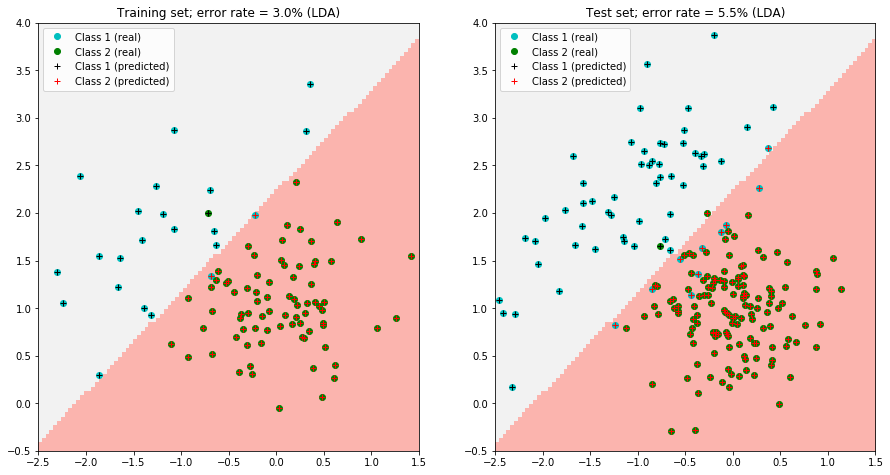

In [26]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(predicted_grid_LDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_trainset_LDA[predicted_trainset_LDA[:,0]==1,1],predicted_trainset_LDA[predicted_trainset_LDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_trainset_LDA[predicted_trainset_LDA[:,0]==2,1],predicted_trainset_LDA[predicted_trainset_LDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_LDA*100)+"% (LDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(predicted_grid_LDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_testset_LDA[predicted_testset_LDA[:,0]==1,1],predicted_testset_LDA[predicted_testset_LDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_testset_LDA[predicted_testset_LDA[:,0]==2,1],predicted_testset_LDA[predicted_testset_LDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_LDA*100)+"% (LDA)")
plt.legend(loc='upper left')

plt.show()

## Graphical representation for QDA

In [27]:
predicted_grid_QDA = np.zeros(N,dtype = np.int8)
for i in range(N):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(x[i]-mu_1).T.dot(sigma_1_inv).dot(x[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(x[i]-mu_2).T.dot(sigma_2_inv).dot(x[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_grid_QDA[i] = 1
    else:
        predicted_grid_QDA[i] = 2

In [28]:
predicted_grid_QDA = predicted_grid_QDA.reshape(N1,N1)
predicted_grid_QDA = np.rot90(predicted_grid_QDA,k=1,axes=(0,1))

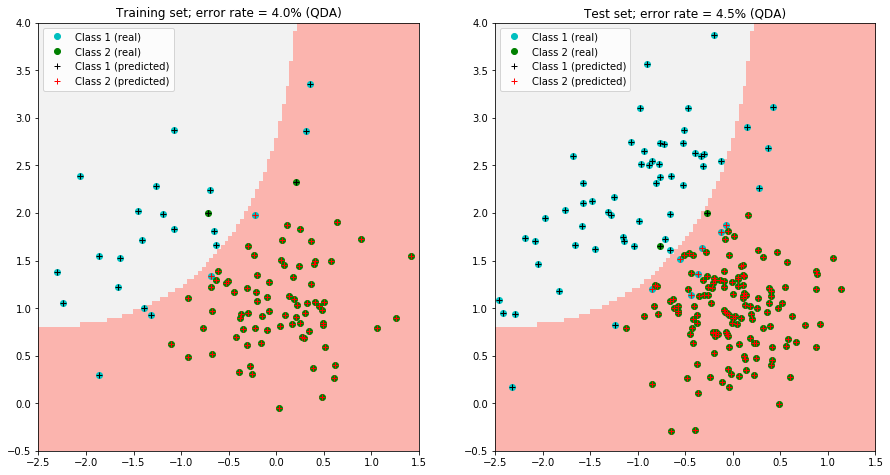

In [29]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(predicted_grid_QDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_trainset_QDA[predicted_trainset_QDA[:,0]==1,1],predicted_trainset_QDA[predicted_trainset_QDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_trainset_QDA[predicted_trainset_QDA[:,0]==2,1],predicted_trainset_QDA[predicted_trainset_QDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_QDA*100)+"% (QDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(predicted_grid_QDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_testset_QDA[predicted_testset_QDA[:,0]==1,1],predicted_testset_QDA[predicted_testset_QDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_testset_QDA[predicted_testset_QDA[:,0]==2,1],predicted_testset_QDA[predicted_testset_QDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_QDA*100)+"% (QDA)")
plt.legend(loc='upper left')

plt.show()

In the case of QDA, the boundaries are quadratic. That is because in the case of QDA no assumption is made on the covariance matrixes $\Sigma_{i}$.

Funnily enough, 

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




Let's first import the packages we need.

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

### LDA with scikit-learn module

In [31]:
clf_lda = lda()
clf_lda.fit(trainset,train[:,0])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [32]:
pred_train_LDA_sckl = clf_lda.predict(trainset)
pred_test_LDA_sckl = clf_lda.predict(testset)

In [33]:
pred_train_LDA_sckl= np.reshape(pred_train_LDA_sckl,(-1,1))
pred_train_LDA_sckl = np.concatenate((pred_train_LDA_sckl,trainset),axis = 1)

In [34]:
pred_test_LDA_sckl= np.reshape(pred_test_LDA_sckl,(-1,1))
pred_test_LDA_sckl = np.concatenate((pred_test_LDA_sckl,testset),axis = 1)

In [35]:
train_error_LDA_sckl = 1-clf_lda.score(trainset,train[:,0])
test_error_LDA_sckl = 1-clf_lda.score(testset,test[:,0])

### QDA with scikit-learn module

In [36]:
clf_qda = qda()
clf_qda.fit(trainset,train[:,0])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [37]:
pred_train_QDA_sckl = clf_qda.predict(trainset)
pred_test_QDA_sckl = clf_qda.predict(testset)

In [38]:
pred_train_QDA_sckl= np.reshape(pred_train_QDA_sckl,(-1,1))
pred_train_QDA_sckl = np.concatenate((pred_train_QDA_sckl,trainset),axis = 1)

In [39]:
pred_test_QDA_sckl= np.reshape(pred_test_QDA_sckl,(-1,1))
pred_test_QDA_sckl = np.concatenate((pred_test_QDA_sckl,testset),axis = 1)

In [40]:
train_error_QDA_sckl = 1-clf_qda.score(trainset,train[:,0])
test_error_QDA_sckl = 1-clf_qda.score(testset,test[:,0])

In [41]:
train[:,0]

array([2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.])

### Graphical representation for LDA

In [42]:
pred_grid_LDA_sckl = clf_lda.predict(x)
pred_grid_LDA_sckl = pred_grid_LDA_sckl.reshape(N1,N1)
pred_grid_LDA_sckl = np.rot90(pred_grid_LDA_sckl,k=1,axes=(0,1))

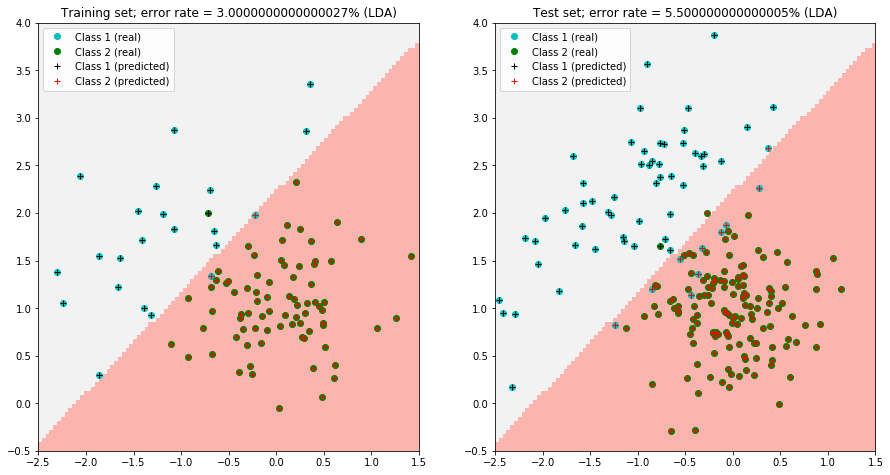

In [43]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(pred_grid_LDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==1,1],pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==2,1],pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_LDA_sckl *100)+"% (LDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(pred_grid_LDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==1,1],pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==2,1],pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_LDA_sckl *100)+"% (LDA)")
plt.legend(loc='upper left')

plt.show()

### Graphical representation for QDA

In [44]:
pred_grid_QDA_sckl = clf_qda.predict(x)
pred_grid_QDA_sckl = pred_grid_QDA_sckl.reshape(N1,N1)
pred_grid_QDA_sckl = np.rot90(pred_grid_QDA_sckl,k=1,axes=(0,1))

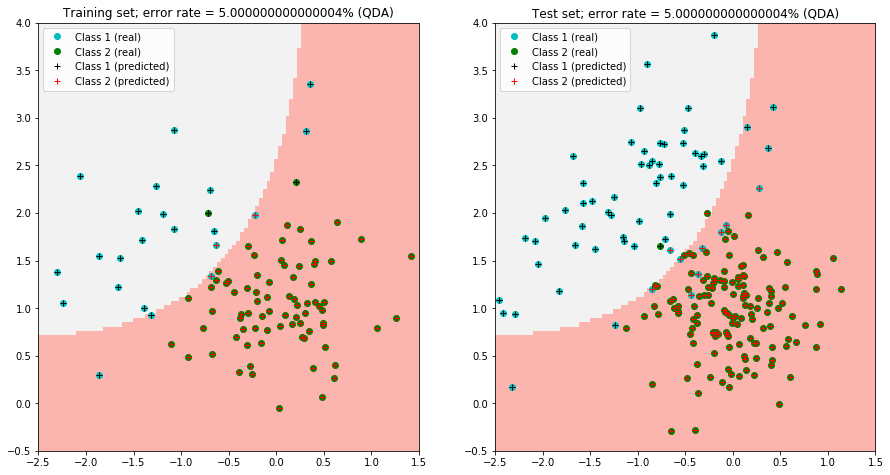

In [45]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(pred_grid_QDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==1,1],pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==2,1],pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_QDA_sckl *100)+"% (QDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(pred_grid_QDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==1,1],pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==2,1],pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_QDA_sckl *100)+"% (QDA)")
plt.legend(loc='upper left')

plt.show()